In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import json

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from efficientnet_pytorch import EfficientNet

In [2]:
train_df = pd.read_csv("preprocessed_train.csv", encoding='euc-kr')

In [3]:
train_df_x = train_df.drop(['label', '분석데이터'], axis=1)

In [4]:
train_df_y = train_df['label']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(train_df_x, train_df_y, test_size=0.2, random_state=42)

In [6]:
x_train

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
9254,92,13.500000,1242,5.617271,0,0,0,1,16738,4323,...,9,11,5,12,3,0,2,3,2,0
1561,629,11.941176,7511,6.061898,0,0,0,4,36467,335,...,72,35,84,76,27,13,34,20,21,24
1670,362,5.748619,2081,6.047759,0,0,0,7,393967,32891,...,9,5,8,23,4,19,11,10,7,4
6087,27790,5.742965,159597,6.560686,0,0,0,75,4663,170,...,1796,1502,2255,1308,2056,1381,1569,1239,1632,1320
6669,2042,8.457884,17271,6.306899,0,9,0,3,16454,9185,...,138,138,141,171,114,84,122,99,98,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,728,21.414835,15590,5.339247,0,0,0,1,5083,22,...,151,19,23,172,2,0,0,0,0,0
5191,31774,11.639391,369830,5.401709,0,31,0,1,125002,6049,...,1930,2522,2864,4418,690,381,338,440,231,335
5390,596,7.041946,4197,6.054880,0,0,0,6,220163,20051,...,28,40,19,27,24,18,37,24,11,15
860,205,11.965854,2453,5.786017,0,0,0,1,43248,24338,...,13,15,16,11,1,1,0,1,1,3


In [7]:
x_test

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
6252,322,14.465839,4658,5.727650,1,0,0,1,16382,362,...,47,22,37,35,12,2,8,7,0,3
4684,905,11.585635,10485,5.863804,0,0,0,7,556624,141386,...,61,130,94,116,31,22,16,37,29,38
1731,71103,12.933730,919627,5.825820,0,0,0,42,32479,19871,...,3726,2856,7919,14652,1581,1086,2448,1175,1135,1118
4742,4162,9.887794,41153,6.116438,0,0,0,9,7687,502,...,212,156,196,217,165,149,141,144,142,5366
4521,64,16.078125,1029,5.794510,1,0,0,1,99747,7113,...,8,2,7,4,1,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,4,14.250000,57,4.404366,0,0,0,1,95534,7356,...,0,0,0,0,0,0,0,0,0,0
8285,16828,5.795401,97525,6.539994,1,0,0,39,37231,4295,...,1135,807,1476,658,1462,781,860,649,978,678
7853,3312,24.904287,82483,5.833135,0,39,0,8,30819,3000,...,437,969,803,851,116,123,181,100,75,86
1095,51256,11.418039,585243,5.888161,0,0,0,37,39342,2370,...,2888,2557,5104,8930,1519,962,1754,1001,1050,1016


In [8]:
y_train

9254    0
1561    1
1670    1
6087    0
6669    0
       ..
5734    1
5191    1
5390    0
860     1
7270    0
Name: label, Length: 8000, dtype: int64

In [9]:
y_test

6252    0
4684    1
1731    1
4742    1
4521    1
       ..
6412    1
8285    0
7853    1
1095    1
6929    0
Name: label, Length: 2000, dtype: int64

## 데이터 정형화

In [10]:
# robustScaler = RobustScaler()

In [11]:
# robustScaler.fit(x_train)

In [12]:
# x_train_scaled = robustScaler.transform(x_train)

In [13]:
# x_test_scaled = robustScaler.transform(x_test)

In [14]:
"""
st_scaler = StandardScaler()
st_scaler.fit(x_train)
"""

'\nst_scaler = StandardScaler()\nst_scaler.fit(x_train)\n'

In [15]:
# x_train_scaled = st_scaler.transform(x_train)

In [16]:
# x_test_scaled = st_scaler.transform(x_test)

In [17]:
minmax_sclaer = MinMaxScaler()
minmax_sclaer.fit(x_train)

MinMaxScaler()

In [18]:
x_train_scaled = minmax_sclaer.transform(x_train)

In [19]:
x_test_scaled = minmax_sclaer.transform(x_test)

In [20]:
"""
maxCol = x_train.max()
col = x_train.columns
for i in range(len(maxCol)):
    x_train[col[i]] = x_train[col[i]] / maxCol[i]
"""

'\nmaxCol = x_train.max()\ncol = x_train.columns\nfor i in range(len(maxCol)):\n    x_train[col[i]] = x_train[col[i]] / maxCol[i]\n'

In [21]:
x_train_scaled

array([[2.14300001e-04, 1.05789234e-03, 1.35693455e-04, ...,
        5.60391527e-05, 8.17561215e-05, 0.00000000e+00],
       [1.49295667e-03, 8.58906951e-04, 8.46355333e-04, ...,
        3.73594351e-04, 8.58439276e-04, 9.79272074e-04],
       [8.57200004e-04, 6.84207603e-05, 2.30803571e-04, ...,
        1.86797176e-04, 2.86146425e-04, 1.63212012e-04],
       ...,
       [1.41438001e-03, 2.33515314e-04, 4.70676044e-04, ...,
        4.48313222e-04, 4.49658668e-04, 6.12045047e-04],
       [4.83365558e-04, 8.62057019e-04, 2.72973967e-04, ...,
        1.86797176e-05, 4.08780607e-05, 1.22409009e-04],
       [9.19108893e-04, 1.41288056e-03, 7.11001962e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [22]:
x = x_train_scaled

x1 = np.zeros((8000,22,28))
x2 = np.zeros((8000,22,28,1))

for i in range(len(x_train)):
    x1[i] = x[i].reshape((22,28))
    for j in range(22):
        for k in range(28):
            x2[i][j][k][0] = x1[i][j][k]
            
x_train_pre = x2

In [23]:
x1.shape

(8000, 22, 28)

In [24]:
y_train = y_train.to_numpy()

In [25]:
"""
maxCol2 = x_test.max()
col2 = x_test.columns
for i in range(len(maxCol2)):
    x_test[col[i]] = x_test[col[i]] / maxCol2[i] 
"""

'\nmaxCol2 = x_test.max()\ncol2 = x_test.columns\nfor i in range(len(maxCol2)):\n    x_test[col[i]] = x_test[col[i]] / maxCol2[i] \n'

In [27]:
xt = x_test_scaled

xt1 = np.zeros((2000,22,28))
xt2 = np.zeros((2000,22,28,1))

for i in range(len(x_test)):
    xt1[i] = xt[i].reshape((22,28))
    for j in range(22):
        for k in range(28):
            xt2[i][j][k][0] = xt1[i][j][k]
            
x_test_pre = xt2

In [28]:
y_test = y_test.to_numpy()

In [110]:
x_test_pre.shape

(2000, 22, 28, 1)

In [111]:
x_train_pre.shape

(8000, 22, 28, 1)

In [108]:
# 합성곱 층 만들기

model = models.Sequential()
model.add(layers.Conv2D(32, (2,2), activation='relu', input_shape=(22, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [109]:
# 마지막에 Dense 층 추가하기
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='softmax'))

ResourceExhaustedError: OOM when allocating tensor with shape[19436544,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [ ]:
model.summary()

In [104]:
# 모델 컴파일과 훈련하기
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
250/250 [==============================] - 2s 5ms/step - loss: 0.6090 - accuracy: 0.5500
Epoch 2/5
250/250 [==============================] - 1s 5ms/step - loss: 0.5512 - accuracy: 0.5500
Epoch 3/5
250/250 [==============================] - 1s 5ms/step - loss: 0.5222 - accuracy: 0.5500
Epoch 4/5
250/250 [==============================] - 1s 5ms/step - loss: 0.4955 - accuracy: 0.5500
Epoch 5/5
250/250 [==============================] - 1s 5ms/step - loss: 0.4747 - accuracy: 0.5500


In [105]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test_pre, y_test, verbose=2)
print(test_acc)

63/63 - 0s - loss: 0.4698 - accuracy: 0.5500
0.550000011920929


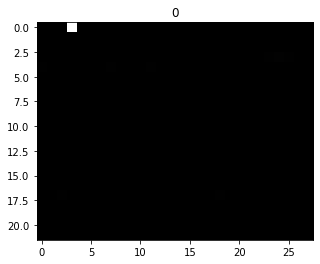

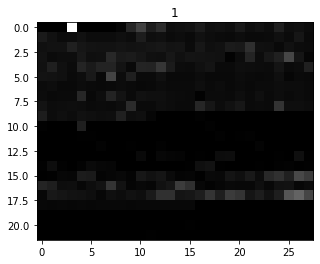

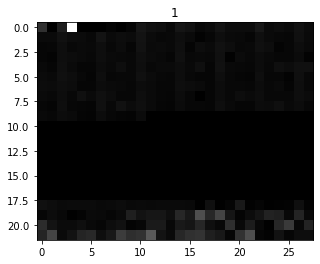

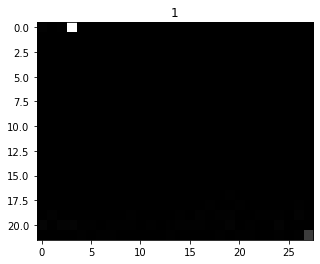

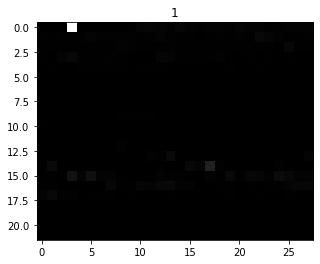

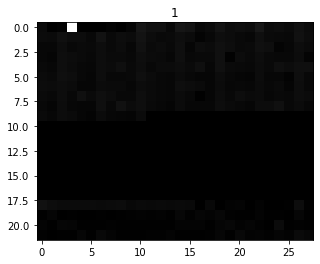

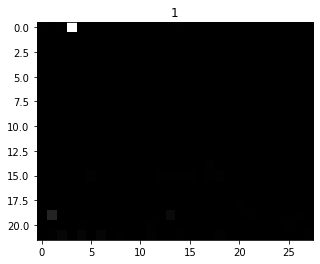

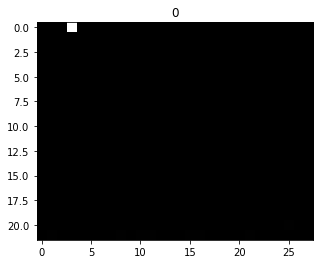

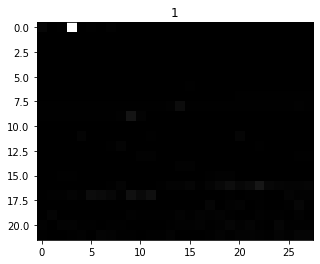

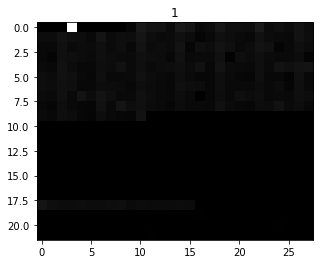

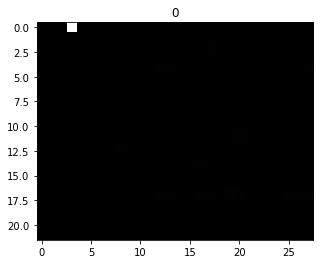

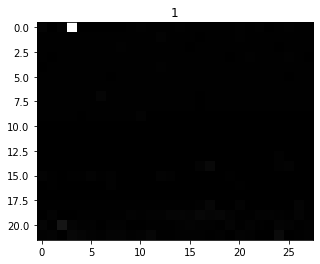

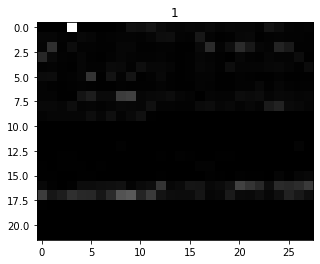

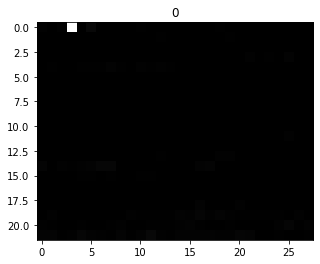

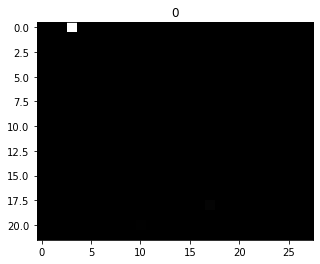

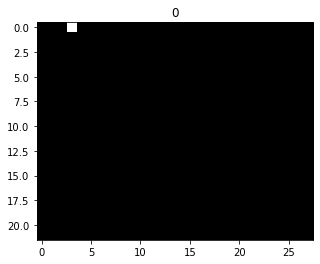

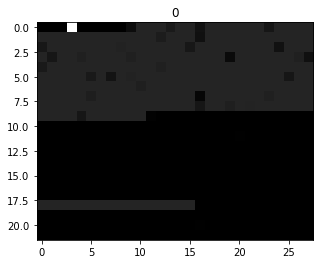

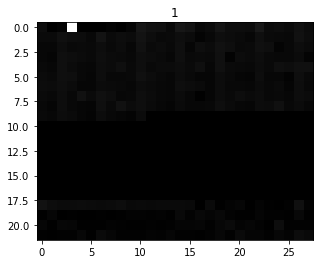

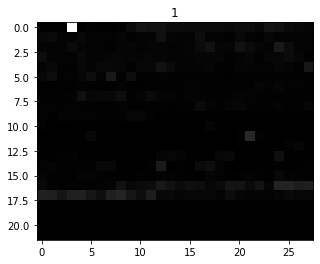

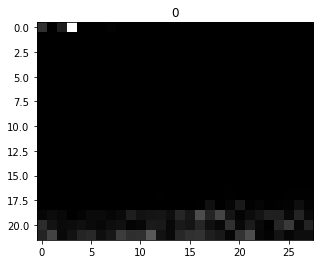

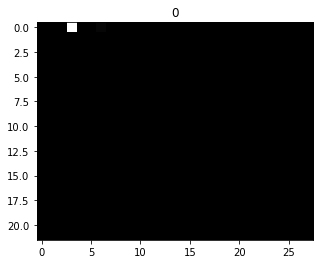

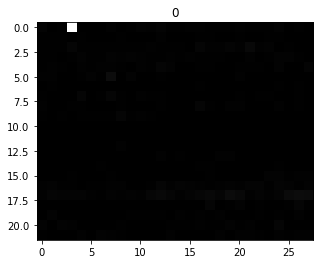

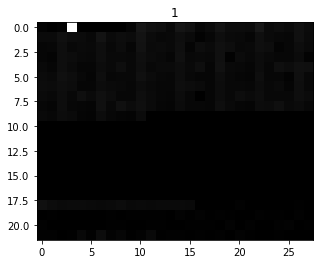

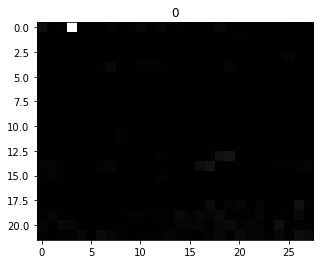

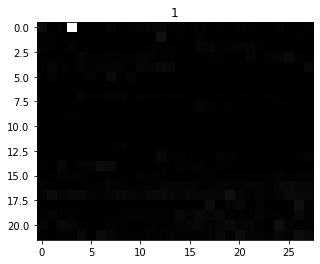

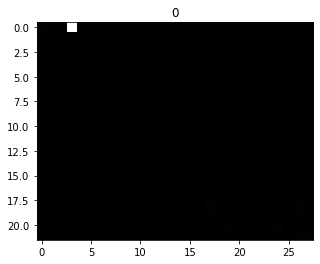

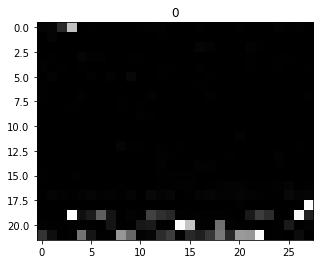

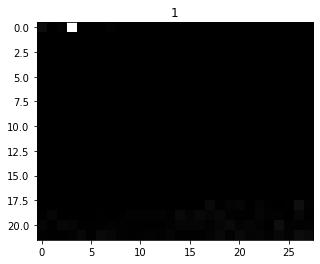

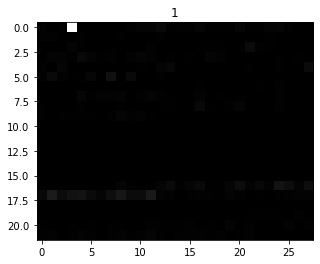

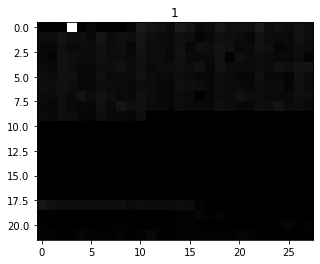

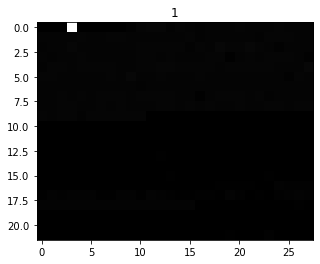

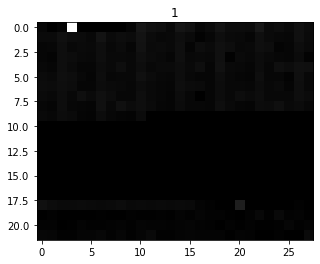

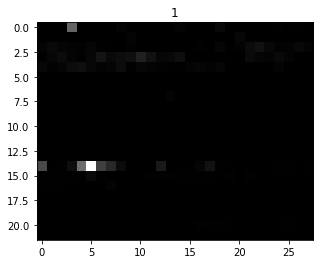

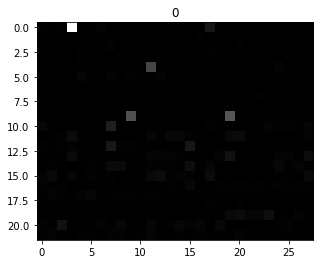

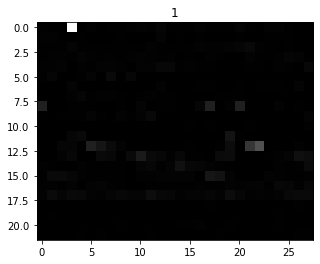

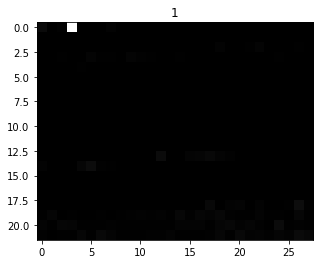

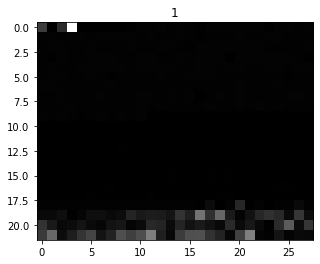

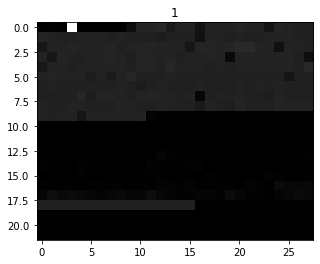

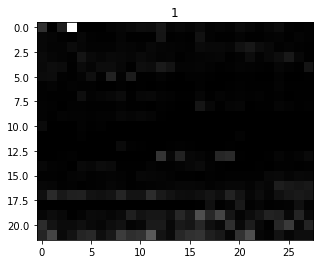

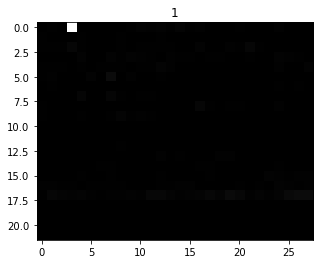

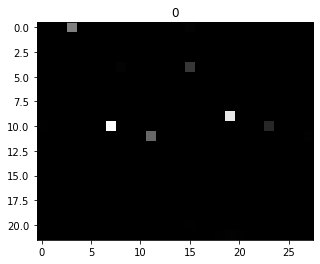

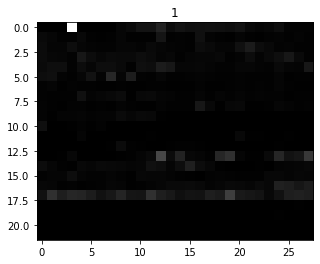

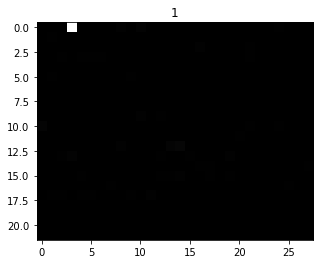

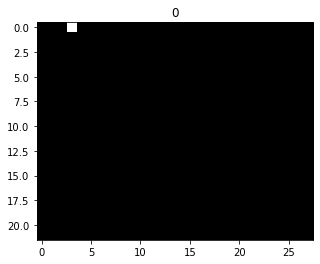

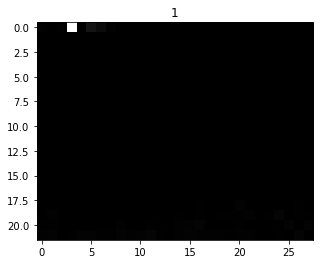

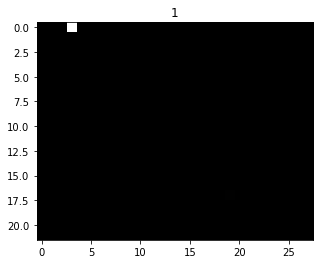

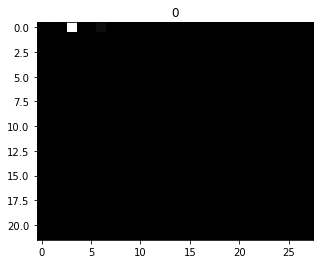

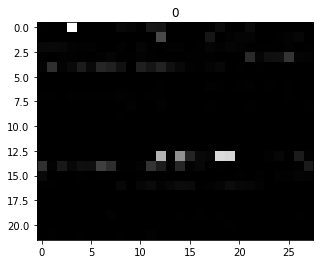

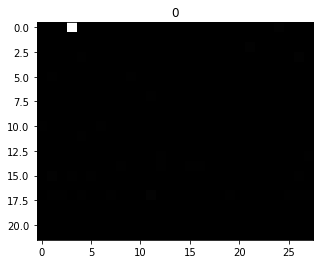

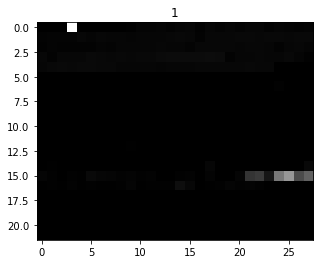

In [35]:
from matplotlib import pyplot as plt

for i in range(50):
    plt.imshow(x_test_pre[i], cmap='gray', interpolation='nearest')
    plt.title(str(y_test[i]))
    plt.show()